In [39]:
import pandas as pd
import numpy as np
data = pd.read_csv("basketball.csv")
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
0,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000
1,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211
2,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000
3,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
4,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804


- Data basketball bao gồm các thông số kỹ thuật của các cầu thủ bóng rổ nhà nghề Mỹ
- Có 2 thông số quan trọng nhất là 'ppg' số điểm kiếm được trên mỗi trận và 'atr' là 'Assist Turnover Ratio' tỉ lệ hỗ trợ
- Yêu cầu : Dựa vào 2 features đó hãy cluster data thành 5 nhóm cầu thủ loại 0 -> 4

In [40]:
#tạo ra 5 điểm làm center ban đầu bằng cách lấy ngẫy nhiên từ data
num_cluster  = 5 
random_idx = np.random.choice(data.index, 5)
center_df = data.loc[random_idx,:].copy()
print(random_idx)
center_df

[41 78  7 53 18]


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
41,Shelvin Mack,PG,23,ATL,73,11,1490,209,501,0.417,...,271,50,2,89,100,544,2013-2014,2013,7.452055,3.044944
78,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,...,392,93,13,143,148,915,2013-2014,2013,14.296875,2.741259
7,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,233,52,13,117,146,645,2013-2014,2013,8.958333,1.991453
53,Tony Parker,PG,31,SAS,68,68,1997,456,914,0.499,...,388,36,9,151,86,1134,2013-2014,2013,16.676471,2.569536
18,Toney Douglas,PG,27,TOT,51,17,675,73,190,0.384,...,68,19,5,34,81,202,2013-2014,2013,3.960784,2.000000


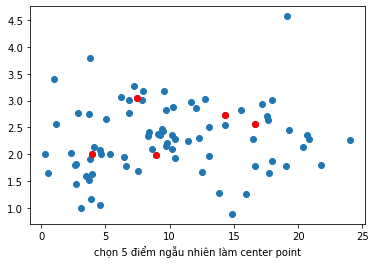

In [41]:
# vẽ biểu đồ sau khi chọn ngẫu nhiên 5 điểm làm trung tâm ban đầu, và chưa phân cụm data
import matplotlib.pyplot as plt
plt.scatter(data['ppg'],data['atr'])
plt.scatter(center_df['ppg'],center_df['atr'], color = 'red')
plt.xlabel('chọn 5 điểm ngẫu nhiên làm center point')
plt.show()

In [42]:
def create_dict_center(df_center):
    """
    hàm đưa 5 điểm center vào 1 dict riêng có values là tọa độ điểm (ppg-atr) 
    và key chính là tên cluster để dùng cho phần sau
    """
    count = 0
    dict_center = {}
    for idx, row in df_center.iterrows():
        coordinates =  [row['ppg'],row['atr']]
        dict_center[count]  = coordinates
        count += 1   
    return dict_center
center_dict = create_dict_center(center_df)    
center_dict

{0: [7.4520547945205475, 3.044943820224719],
 1: [14.296875, 2.741258741258741],
 2: [8.958333333333334, 1.9914529914529917],
 3: [16.676470588235293, 2.5695364238410594],
 4: [3.9607843137254894, 2.0]}

In [43]:
def caculated_distance(center_point, player_point):
    
    """
    hàm tính khoảng cách euclid = (sum((q1-p1)^2 + ...+ (qn-pn)^2))^0.5
    """
    import math
    sum_dis = 0
    for i in range(len(center_point)):
        distance = center_point[i] - player_point[i]
        sum_dis += distance**2
    eculid_dis = math.sqrt(sum_dis)
    return eculid_dis

In [44]:
def excute_cluster(row):
    '''
    excute_cluster: hàm thực hiện phân cụm
    - Input: chỉ nhận 1 dòng của data,
    kết hợp với hàm apply bên ngoài hàm sẽ tính vs so sánh đc khoảng cách toàn bộ tập dữ liệu
    - Output: return label: 0,1,2,3,4
    - từ mỗi điểm quan sát tính 5 khoảng cách tới 5 center_point và so sánh ,
    => điểm quan sát sẽ thuộc cluster mà khoảng cách từ điểm đó đến center_point ngắn nhất.
    '''
    lowest_dis = None
    cluster_id = None
    play_pts = [row['ppg'], row['atr']]
    
    for keys, values in center_dict.items():
        distance = caculated_distance(values, play_pts)
        
        if lowest_dis == None:
            cluster_id = keys
            lowest_dis = distance
            
        elif distance < lowest_dis:
            lowest_dis = distance
            cluster_id = keys           
    return cluster_id
         
data['cluster'] = data.apply(lambda row: excute_cluster(row)  , axis = 1)

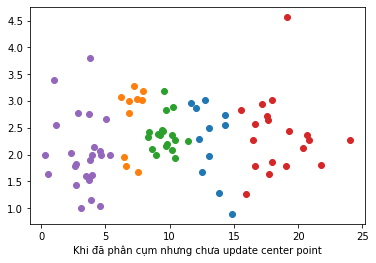

In [45]:
#visualize data khi đã phân cụm ( nhưng chưa update center point)
unique_cluster = data['cluster'].unique()
unique_cluster
for i in unique_cluster:
    df_temp = data[data['cluster']==i]
    plt.scatter(df_temp['ppg'],df_temp['atr'])
plt.xlabel('Khi đã phân cụm nhưng chưa update center point')    
plt.show()

In [46]:
def update_center_point(df):
    '''
    hàm update lại center point
    input: dict center 
    output: dict mới với values là các điểm có giá trị trung bình trong tập đã cluster
    '''
    dict_update = dict()
    for i in range(0, num_cluster):
        filter_df = df[df['cluster'] == i].copy()
        dict_update[i] = [np.mean(filter_df['ppg']), np.mean(filter_df['atr']) ]
                                  
    return dict_update

# Code Full

vẽ biểu đồ sau khi chọn ngẫu nhiên 5 điểm làm trung tâm ban đầu, và chưa phân cụm data: 


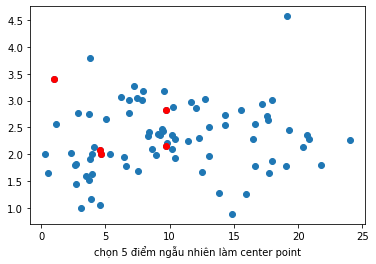

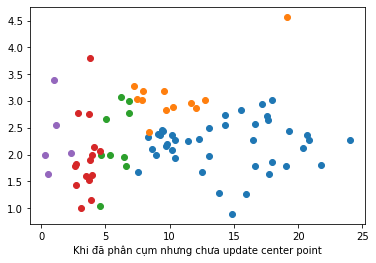

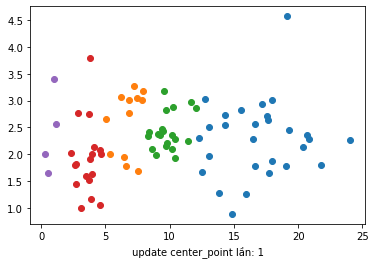

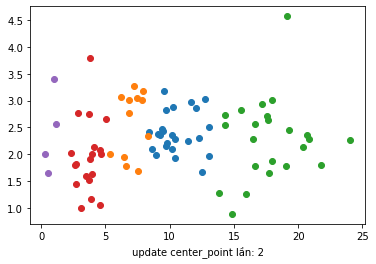

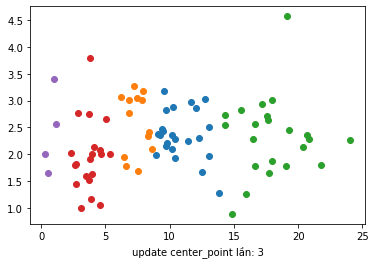

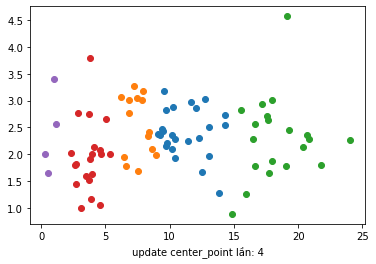

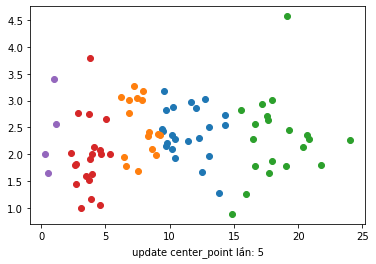

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv("basketball.csv")
num_cluster  = 5 
random_idx = np.random.choice(data.index, 5)
center_df = data.loc[random_idx,:].copy()

print('vẽ biểu đồ sau khi chọn ngẫu nhiên 5 điểm làm trung tâm ban đầu, và chưa phân cụm data: ')
import matplotlib.pyplot as plt
plt.scatter(data['ppg'],data['atr'])
plt.scatter(center_df['ppg'],center_df['atr'], color = 'red')
plt.xlabel('chọn 5 điểm ngẫu nhiên làm center point')
plt.show()

def create_dict_center(df_center):
    """
    hàm đưa 5 điểm center vào 1 dict riêng có values là tọa độ điểm (ppg-atr) 
    và key chính là tên cluster để dùng cho phần sau
    """
    count = 0
    dict_center = {}
    for idx, row in df_center.iterrows():
        coordinates =  [row['ppg'],row['atr']]
        dict_center[count]  = coordinates
        count += 1   
    return dict_center
  
def caculated_distance(center_point, player_point):
    
    """
    hàm tính khoảng cách euclid = (sum((q1-p1)^2 + ...+ (qn-pn)^2))^0.5
    """
    import math
    sum_dis = 0
    for i in range(len(center_point)):
        distance = center_point[i] - player_point[i]
        sum_dis += distance**2
    eculid_dis = math.sqrt(sum_dis)
    return eculid_dis

def excute_cluster(row):
    '''
    excute_cluster: hàm thực hiện phân cụm
    - Input: chỉ nhận 1 dòng của data,
    kết hợp với hàm apply bên ngoài hàm sẽ tính vs so sánh đc khoảng cách toàn bộ tập dữ liệu
    - Output: return label: 0,1,2,3,4
    - từ mỗi điểm quan sát tính 5 khoảng cách tới 5 center_point và so sánh ,
    => điểm quan sát sẽ thuộc cluster mà khoảng cách từ điểm đó đến center_point ngắn nhất.
    '''
    lowest_dis = None
    cluster_id = None
    play_pts = [row['ppg'], row['atr']]
    
    for keys, values in center_dict.items():
        distance = caculated_distance(values, play_pts)
        
        if lowest_dis == None:
            cluster_id = keys
            lowest_dis = distance
            
        elif distance < lowest_dis:
            lowest_dis = distance
            cluster_id = keys           
    return cluster_id
    
def update_center_point(df):
    '''
    hàm update lại center point
    input: dict center 
    output: dict mới với values là các điểm có giá trị trung bình trong tập đã cluster
    '''
    dict_update = dict()
    for i in range(0, num_cluster):
        filter_df = df[df['cluster'] == i].copy()
        dict_update[i] = [np.mean(filter_df['ppg']), np.mean(filter_df['atr']) ]
                                  
    return dict_update


center_dict = create_dict_center(center_df)  
data['cluster'] = data.apply(lambda row: excute_cluster(row)  , axis = 1)
#visualize data khi đã phân cụm ( nhưng chưa update center point)
unique_cluster = data['cluster'].unique()
unique_cluster
for i in unique_cluster:
    df_temp = data[data['cluster']==i]
    plt.scatter(df_temp['ppg'],df_temp['atr'])
plt.xlabel('Khi đã phân cụm nhưng chưa update center point')    
plt.show()

for i in range(5):
    center_dict = update_center_point(data)
    data['cluster'] = data.apply(lambda row: excute_cluster(row)  , axis = 1)
    unique_cluster = data['cluster'].unique()
    for k in unique_cluster:
        df_temp = data[data['cluster']==k]
        plt.scatter(df_temp['ppg'],df_temp['atr'])
    plt.xlabel(f'update center_point lần: {i+1}',)    
    plt.show()